# Laboratorio 1

### Marcos Iván Hernandez

## Ejercicio 1

In [9]:
import cv2
import numpy as np

def manipular_color(imagen, color):
    # Separar los canales de color
    b, g, r = cv2.split(imagen)
    
    # Crear una imagen de ceros del mismo tamaño
    resultado = np.zeros_like(imagen)
    
    if color == 1:
        resultado[:,:,0] = b  # Solo canal azul
    elif color == 2:
        resultado[:,:,1] = g  # Solo canal verde
    elif color == 3:
        resultado[:,:,2] = r  # Solo canal rojo
    elif color == 10:
        resultado[:,:,1] = g  # Verde
        resultado[:,:,2] = r  # Rojo
    elif color == 20:
        resultado[:,:,0] = b  # Azul
        resultado[:,:,1] = g  # Verde
    elif color == 30:
        resultado[:,:,0] = b  # Azul
        resultado[:,:,2] = r  # Rojo
    
    return resultado

# Uso de la función:
imagen = cv2.imread('Perrito.jpg') 
resultado = manipular_color(imagen, 1)
cv2.imshow('Resultado', resultado)
cv2.waitKey(0)

-1

## Ejercicio 2

In [41]:
def reconstruir_imagen_color(imagen1, imagen2, imagen3):
    imagen_color = cv2.merge((imagen1, imagen2, imagen3))
    return imagen_color

# Lista de conjuntos de imágenes a procesar
conjuntos_imagenes = [
    ('imagen1/imagen1_salida_gray_azul.jpg', 'imagen1/imagen1_salida_gray_verde.jpg', 'imagen1/imagen1_salida_gray_rojo.jpg'),
    ('imagen2/imagen2_salida_gray_azul.jpg', 'imagen2/imagen2_salida_gray_verde.jpg', 'imagen2/imagen2_salida_gray_rojo.jpg'),
    ('perro/perro_salida_gray_azul.jpg', 'perro/perro_salida_gray_verde.jpg', 'perro/perro_salida_gray_rojo.jpg'),
    # Añade más conjuntos según sea necesario
]


for i, (azul, verde, rojo) in enumerate(conjuntos_imagenes):
    img1 = cv2.imread(azul, 0)
    img2 = cv2.imread(verde, 0)
    img3 = cv2.imread(rojo, 0)
    
    resultado = reconstruir_imagen_color(img1, img2, img3)
    
    # Guardar la imagen resultante
    cv2.imwrite(f'imagen_reconstruida_{i+1}.jpg', resultado)
    
    # Mostrar la imagen (opcional)
    cv2.imshow(f'Imagen Reconstruida {i+1}', resultado)
    cv2.waitKey(0)
    
    # Limpieza opcional
    del resultado
    cv2.destroyAllWindows()

## Ejercicio 3

In [48]:
def separar_en_grises(imagen_color):
    # Separar los canales
    b, g, r = cv2.split(imagen_color)
    return b, g, r

# Uso:
imagen = cv2.imread('Peluche/Peluche.jpg')
b, g, r = separar_en_grises(imagen)
cv2.imwrite('Peluche/Peluche_salida_azul.jpg', b)
cv2.imwrite('Peluche/Peluche_salida_verde.jpg', g)
cv2.imwrite('Peluche/Peluche_salida_rojo.jpg', r)

True

## Ejercicio 4

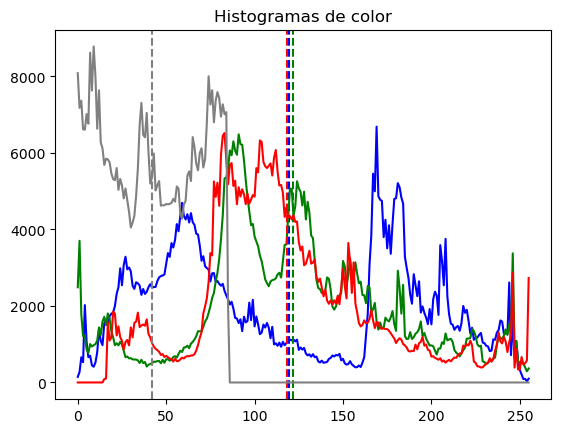

In [53]:
import matplotlib.pyplot as plt

def mostrar_histogramas(imagen):
    b, g, r = cv2.split(imagen)
    gris = (r + g + b) / 3  # Promedio aritmético para escala de grises
    
    colores = ('b', 'g', 'r')
    for i, color in enumerate((b, g, r)):
        hist = cv2.calcHist([color], [0], None, [256], [0, 256])
        plt.plot(hist, color=colores[i])
        plt.axvline(np.mean(color), color=colores[i], linestyle='dashed')
    
    hist = cv2.calcHist([gris.astype(np.uint8)], [0], None, [256], [0, 256])
    plt.plot(hist, color='gray')
    plt.axvline(np.mean(gris), color='gray', linestyle='dashed')
    
    plt.title('Histogramas de color')
    plt.show()

# Uso:
imagen = cv2.imread('imagen9.jpg')
mostrar_histogramas(imagen)

## Ejercicio 5

In [4]:
import cv2
import numpy as np
def escala_grises_ponderada(imagen):
    b, g, r = cv2.split(imagen)
    return np.uint8(0.07 * b + 0.72 * g + 0.21 * r)

# Uso:
imagen = cv2.imread('imagen9.jpg')
gris_ponderado = escala_grises_ponderada(imagen)

cv2.imwrite('CaballoPonderado/Caballo.jpg', gris_ponderado)

cv2.imshow('Escala de grises ponderada', gris_ponderado)
cv2.waitKey(0)

-1

## Ejercicio 6

# Espacio de color HSV

El espacio de color HSV (Hue, Saturation, Value) es una representación alternativa del espacio de color RGB.

- **Hue (Matiz)**: Representa el tipo de color, medido en grados de 0 a 360. Por ejemplo, 0 es rojo, 120 es verde y 240 es azul.
- **Saturation (Saturación)**: Representa la "pureza" del color. Va de 0 (gris) a 100% (color completamente saturado).
- **Value (Valor)**: Representa el brillo del color. Va de 0 (negro) a 100% (brillante).

El mapeo de RGB a HSV se hace mediante fórmulas matemáticas que convierten los valores de R, G y B a H, S y V.

Este espacio de color es útil en procesamiento de imágenes porque separa la información del color (matiz) de su intensidad y saturación, lo que puede ser beneficioso para ciertos algoritmos de visión por computadora.